In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/dl/6khbyrbx22vfbf2s_yjt1zx80000gs/T/ipykernel_30100/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('batch_corrected_tpm.tsv', sep='\t')
df

,rsem.out.D01_MDDC_Ctrl_0h,rsem.out.D01_MDDC_Ctrl_120h,rsem.out.D01_MDDC_Lps_12h,rsem.out.D01_MDDC_Lps_1h,rsem.out.D01_MDDC_Lps_24h,rsem.out.D01_MDDC_Lps_2h,rsem.out.D01_MDDC_Lps_4h,rsem.out.D01_MDDC_Lps_6h,rsem.out.D09_MDDC_Ctrl_0h,rsem.out.D09_MDDC_Ctrl_120h,...,rsem.out.F33_MDDC_Lps_1h,rsem.out.F33_MDDC_Lps_24h,rsem.out.F33_MDDC_Lps_2h,rsem.out.F33_MDDC_Lps_30m,rsem.out.F33_MDDC_Lps_4h,rsem.out.F33_MDDC_Lps_6h,rsem.out.G40_MDDC_Lps_2h,rsem.out.G40_MDDC_Lps_6h,rsem.out.G41_MDDC_Lps_2h,rsem.out.G41_MDDC_Lps_6h
RPS11,2966.003181,2527.217203,2232.529003,2781.490688,1629.466099,2818.612413,2380.521452,2465.919133,2710.162233,3220.602733,...,2975.042984,1878.622185,2693.793328,2923.381798,2203.596572,2096.296081,2832.544701,1987.454305,2474.734283,2314.386619
ELMO2,24.944727,26.241479,45.047532,20.347192,33.263392,18.344631,31.999284,44.436236,24.502283,36.076469,...,23.163764,31.301492,16.788901,24.070872,34.901587,49.222670,24.843361,33.454842,21.330241,41.851846
PNMA1,22.911707,22.911707,21.881046,21.881046,41.122517,21.881046,21.881046,27.010681,21.057745,18.217202,...,21.636211,36.420088,18.179567,25.073311,20.486331,21.636211,20.666177,28.983175,22.456111,29.381395
MMP2,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,1.041861,2.480635,0.874274,...,2.018865,0.931542,0.931542,0.931542,0.931542,2.018865,2.555164,1.632957,2.003892,2.200302
TRAF3IP2-AS1,2.889639,1.583910,1.583910,2.889639,1.583910,1.583910,2.889639,2.889639,1.652200,1.652200,...,1.627323,1.627323,2.942854,1.627323,4.258908,2.942854,2.356925,3.393431,3.395857,2.253869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCIF1,19.313654,19.313654,20.733990,14.990989,28.402056,12.788201,10.550735,17.164767,19.900583,19.900583,...,16.108115,24.789572,10.708126,19.358573,11.786081,16.108115,12.606197,21.777373,16.560121,16.560121
PIK3IP1,8.416499,6.804120,2.418235,5.125868,1.429923,4.254408,0.355897,1.429923,9.827003,7.228761,...,3.862856,4.873248,0.883002,8.967542,2.859646,1.865377,2.178233,5.949715,2.339124,4.619712
SNRPD2,96.862861,79.704790,65.813845,82.004761,79.704790,79.704790,44.615771,65.813845,97.180902,92.159707,...,67.981267,78.123978,84.955390,84.955390,64.630326,60.187407,74.418169,67.742037,52.001339,87.492902
SLC39A6,63.113874,67.075910,58.240562,56.584399,107.865091,59.062463,58.240562,49.778744,63.885608,75.226267,...,66.419768,69.119406,66.419768,70.473403,55.739436,50.476137,51.432619,74.394764,61.052326,64.507886


In [34]:
def print_hello():
    print('hello')

def get_donor_data(all_data, gene_name, donor_id):
    df_gene = all_data.loc[[gene_name]]
    df_donor = df_gene.filter(regex=donor_id)
    dft = df_donor.transpose()
    dft['time'] = dft.index
    dft['time'] = dft['time'].str.split('_').str[3].str.replace('h', '').astype(int)
    dft.sort_values(by='time', inplace=True)
    return dft

In [36]:
df_d01 = get_donor_data(df, 'ELMO2', 'D01')

In [38]:
df_d09 = get_donor_data(df, 'PNMA1', 'D09')

In [39]:
print_hello()

hello


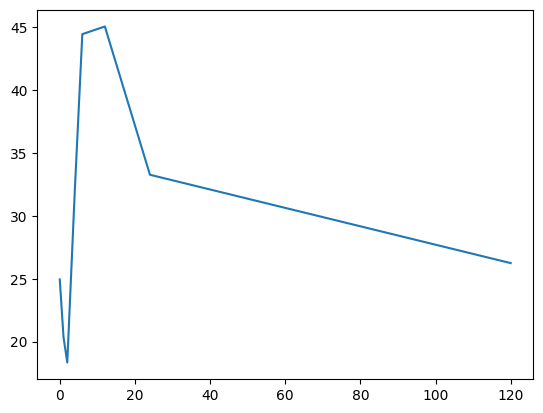

In [40]:
plt.plot(df_d01['time'], df_d01['ELMO2'])

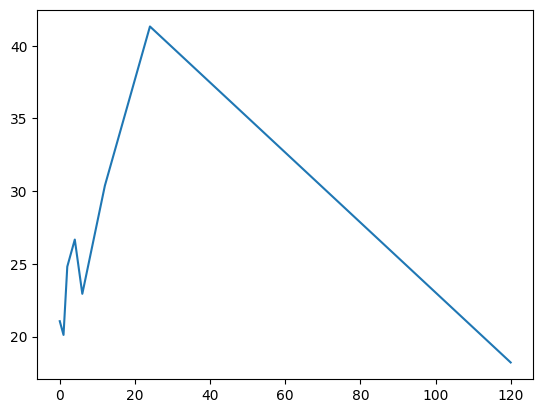

In [41]:
plt.plot(df_d09['time'], df_d09['PNMA1'])

In [ ]:
df = 